<img align="right" src="https://www.tedu.edu.tr/themes/custom/tedu/logo.svg" width="350px" height="350px"/>
<h1 style="font-size:20pt">ADS 542 Statistical Learning Course - Machine Learning (Classification) Project  </h1><br/>
<b> Prepared by: </b> Türkü Yıldırım - 46201160808 <br/>
<b> Instructor: </b> Dr. Hakan Emekçi <br/>
<b> Date: </b>15 June 2024 <br/>

The objective of this project is to build a machine learning model to predict whether a client of a bank will subscribe to a term deposit or not. 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ("yes") or not ("no") subscribed. 

## Table of Contents
* [Dataset Information](#1)
* [Importing Necessary Libraries](#2)
* [Loading the Data](#3)
* [Data Cleaning](#4)
* [Exploratory Data Analysis (EDA) - Descriptive Analaysis](#5)
* [Feature Selection - Engineering](#6)
* [Data Preprocessing](#7)
* [Model Selection](#8)
* [Hyperparameter Tuning](#9)
* [Evaluation](#10)
* [Deployment](#11)
* [References](#12)

### Dataset Information <a class="anchor" id="1">
age: Age of the client (numeric)

job: Occupation (type of job) of the client (categorical)

marital: Marital status of the client (categorical)

education: Education level of the client (categorical)

default: Whether the client has credit in default (categorical)

housing: Whether the client has a housing loan (categorical)

loan: Whether the client has a personal loan (categorical)

contact: Contact communication type (categorical)

month: Last contact month of year (categorical)

day_of_week: Last contact day of the week (categorical)

duration: Last contact duration in seconds. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. (numeric)
    
campaign: Number of contacts performed during this campaign and for this client (numeric)

pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric, 999 means client was not previously contacted)

previous: Number of contacts performed before this campaign and for this client (numeric)

poutcome: Outcome of the previous marketing campaign (categorical)

emp.var.rate: Employment Variation Rate - quarterly indicator (numeric)

cons.price.idx: Consumer Price Index - monthly indicator (numeric)

cons.conf.idx: Consumer Confidence Index - monthly indicator (numeric)

euribor3m: euribor 3 month rate - daily indicator (numeric)

nr.employed: Number of Employees - quarterly indicator (numeric)

y: Target variable: Has the client subscribed a term deposit?

### Importing Neccessary Libraries <a class="anchor" id="2">

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import sklearn 

### Loading the Data <a class="anchor" id="3">

In [2]:
data = pd.read_csv("bank-additional.csv", delimiter = ";")
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,4,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


### Data Cleaning <a class="anchor" id="4">

In [3]:
# Removing duplicates
data.drop_duplicates(inplace=True)

In [4]:
# Converting categorical variables to lowercase (if any)
data = data.apply(lambda x: x.str.lower() if(x.dtype == "object") else x)

In [5]:
# Since duration attribute highly impacts the output target, we drop it. 
# Because the duration is not known before a call is performed.
data = data.drop(columns = "duration", axis=1)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


There is a numeric attribute named pdays means which is the number of days that passed by after the client was last contacted from a previous campaign (There are 999 and other numeric values inside of this column. 999 means client was not previously contacted. We can convert this column to categorical. If the value is equal to 999, we put "0" instead of "999", otherwise we put 1. Then we drop the "pdays" column and set column name as "pdays_cat".


In [6]:
# Converting pdays column numeric to categorical    
data["pdays_cat"]=[0 if each==999  else 1 for each in data.pdays]
data= data.drop(["pdays"],axis=1)

### Exploratory Data Analysis (EDA) - Descriptive Analaysis <a class="anchor" id="5">

In [7]:
# there are 4119 rows and 21 columns
data.shape

(4119, 20)

In [8]:
# names of the columns
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'pdays_cat'],
      dtype='object')

In [9]:
# Displaying basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  campaign        4119 non-null   int64  
 11  previous        4119 non-null   int64  
 12  poutcome        4119 non-null   object 
 13  emp.var.rate    4119 non-null   float64
 14  cons.price.idx  4119 non-null   float64
 15  cons.conf.idx   4119 non-null   float64
 16  euribor3m       4119 non-null   float64
 17  nr.employed     4119 non-null   f

In [10]:
# Displaying basic statistics
data.describe()

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_cat
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.038844
std,10.313362,2.568159,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.193247
min,18.000000,1.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,2.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,3.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,35.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
# Checking for missing values
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
pdays_cat         0
dtype: int64

No missing values!!

In [12]:
# Looking up unique values
data.apply(lambda x: len(x.unique()))

age                67
job                12
marital             4
education           8
default             3
housing             3
loan                3
contact             2
month              10
day_of_week         5
campaign           25
previous            7
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         234
nr.employed        11
y                   2
pdays_cat           2
dtype: int64

In [13]:
num_var = data.describe().columns
cat_var = data.describe(include=[object]).columns

In [14]:
num_var

Index(['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_cat'],
      dtype='object')

In [15]:
cat_var

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

#### Visualizations

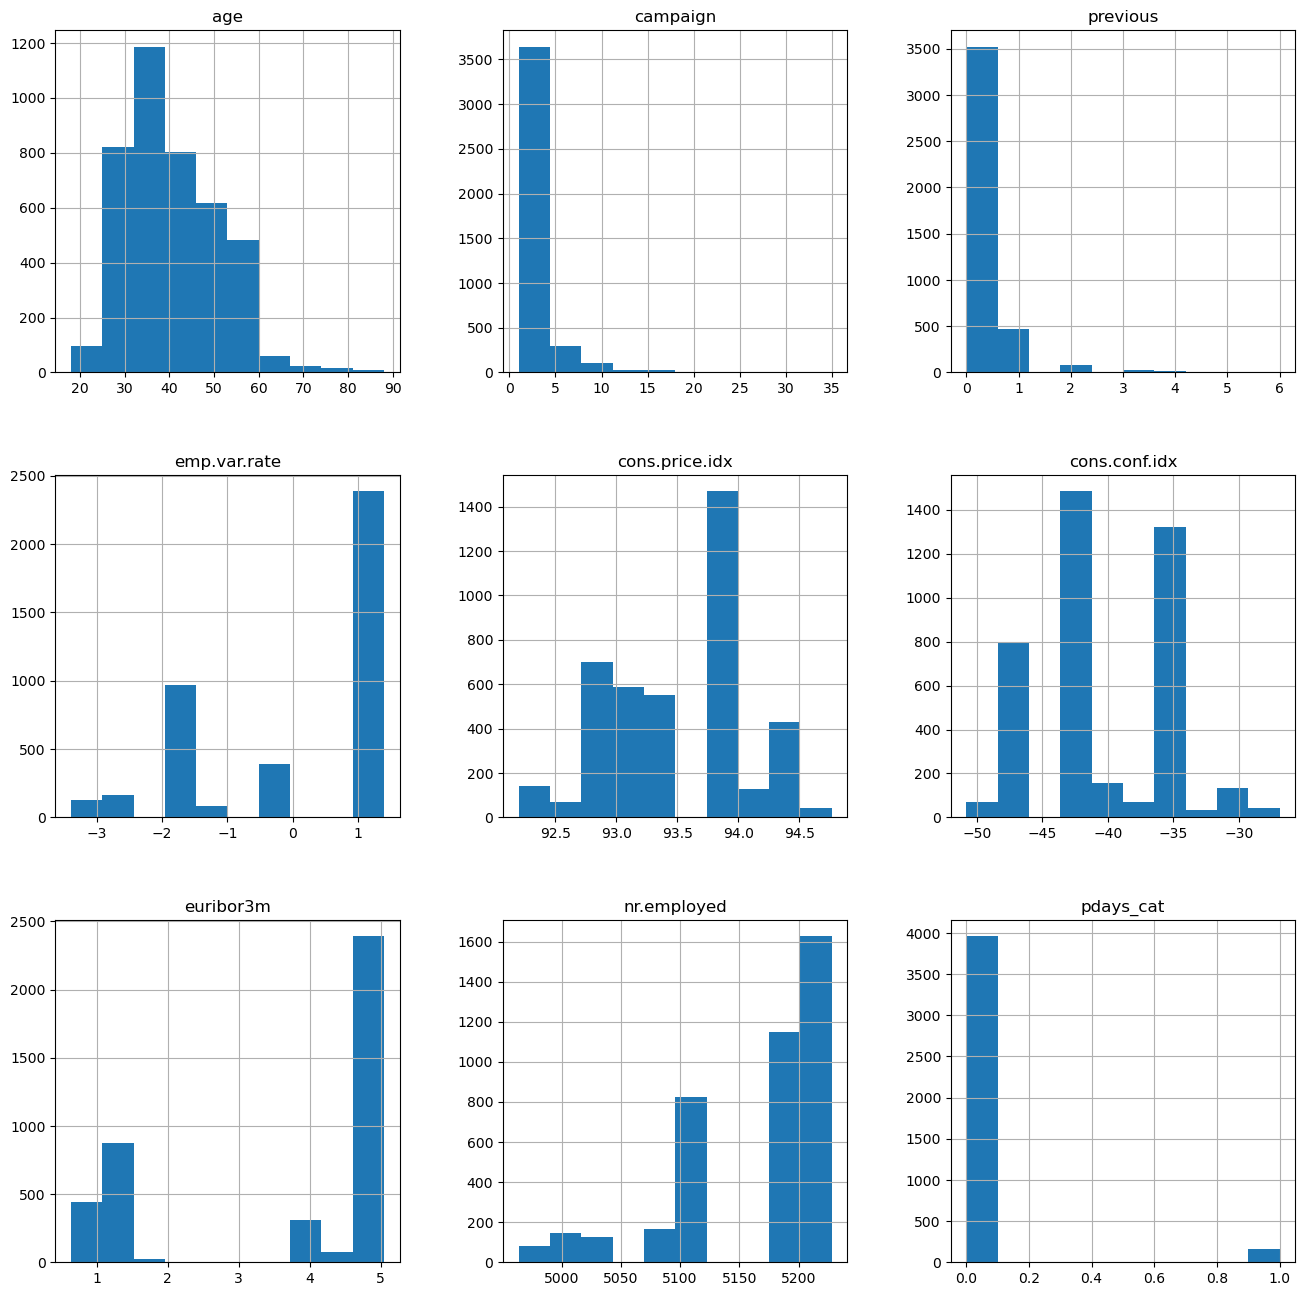

In [16]:
# visualizing numerical features
data.hist(column = num_var, figsize=(16,16))
plt.show()

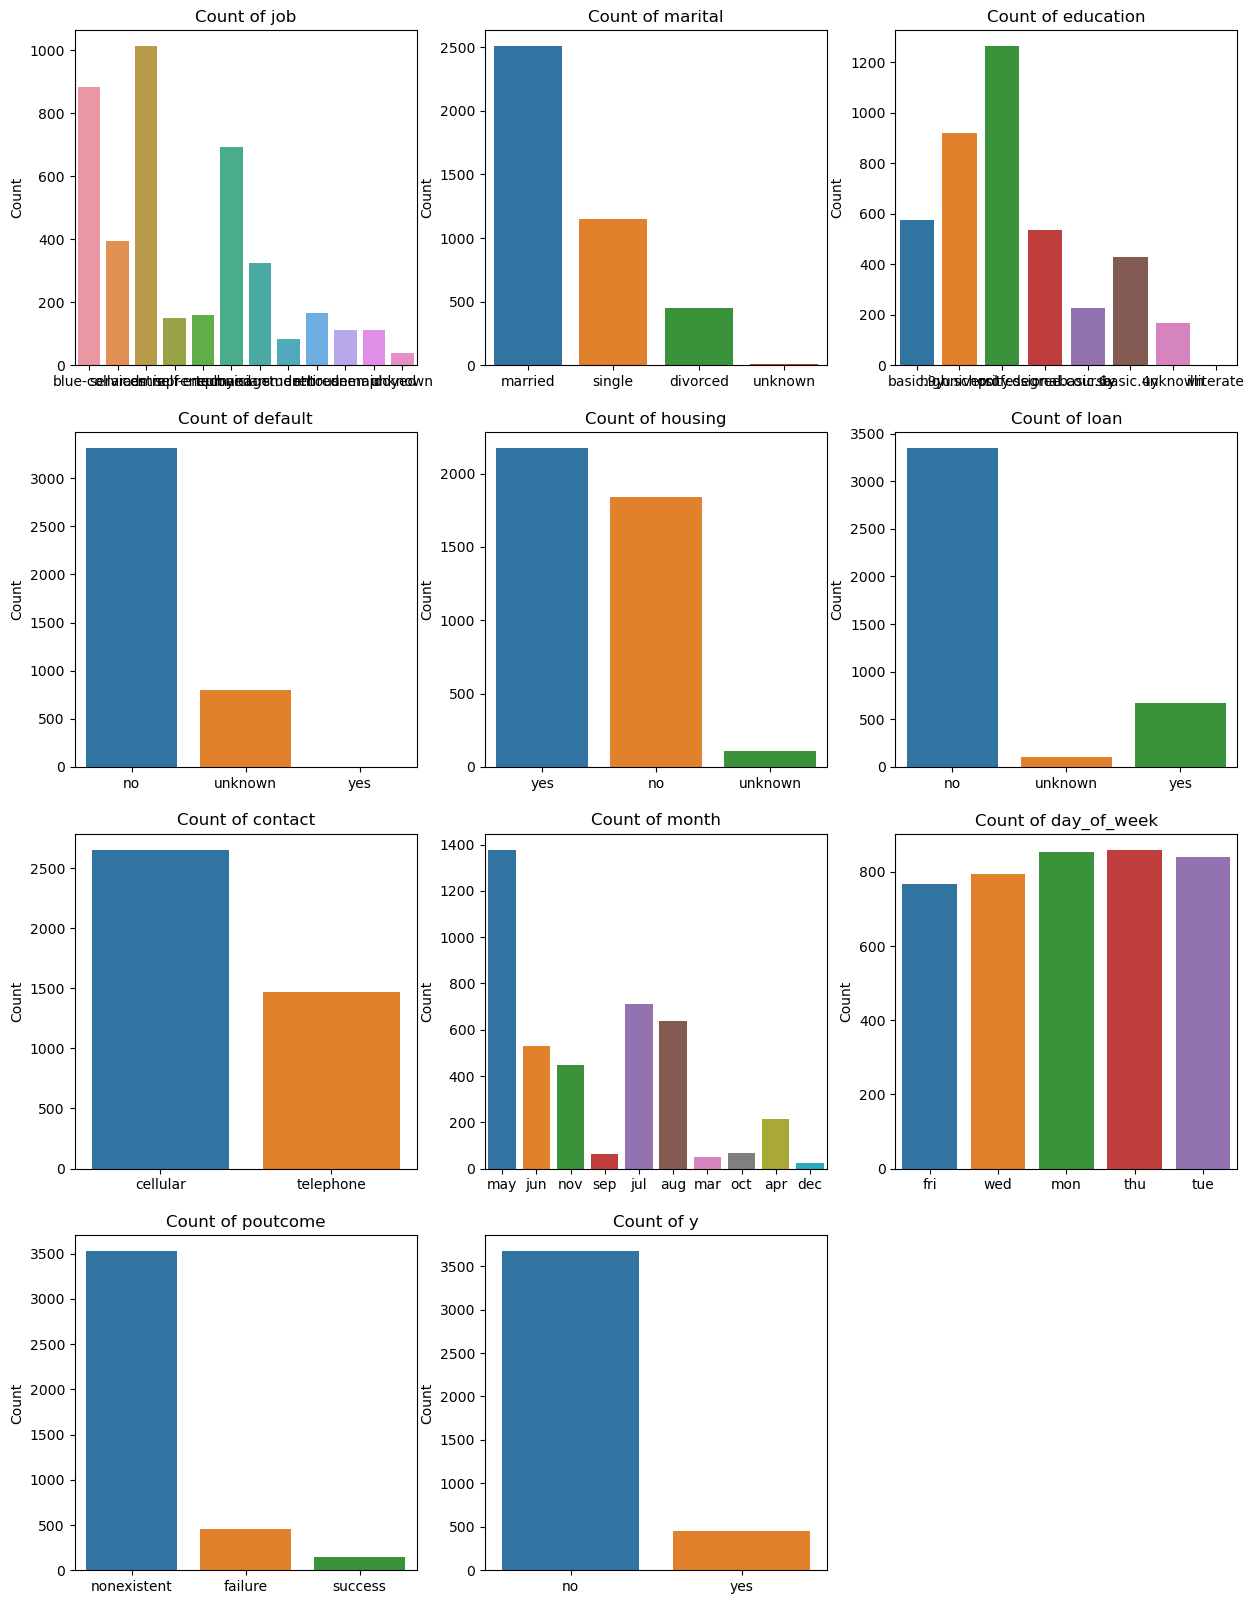

In [17]:
# Seting up the matplotlib figure and axes
fig, axes = plt.subplots(4, 3, figsize=(15, 20))
axes = axes.flatten()

# Loop through each categorical variable and creating a count plot
for i, var in enumerate(cat_var):
    sns.countplot(x=var, data=data, ax=axes[i])
    axes[i].set_title(f"Count of {var}")
    axes[i].set_xlabel('')
    axes[i].set_ylabel("Count")
    
# Removing any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.show()

y
no     3668
yes     451
Name: count, dtype: int64

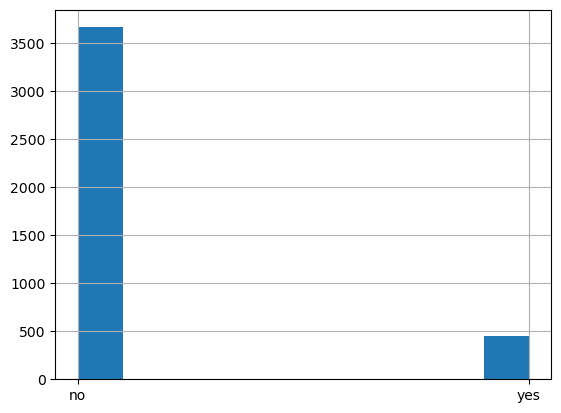

In [18]:
# Checking again whether the target output is imbalanced 
data["y"].hist()
data["y"].value_counts() 

#### Target output is highly imbalanced!

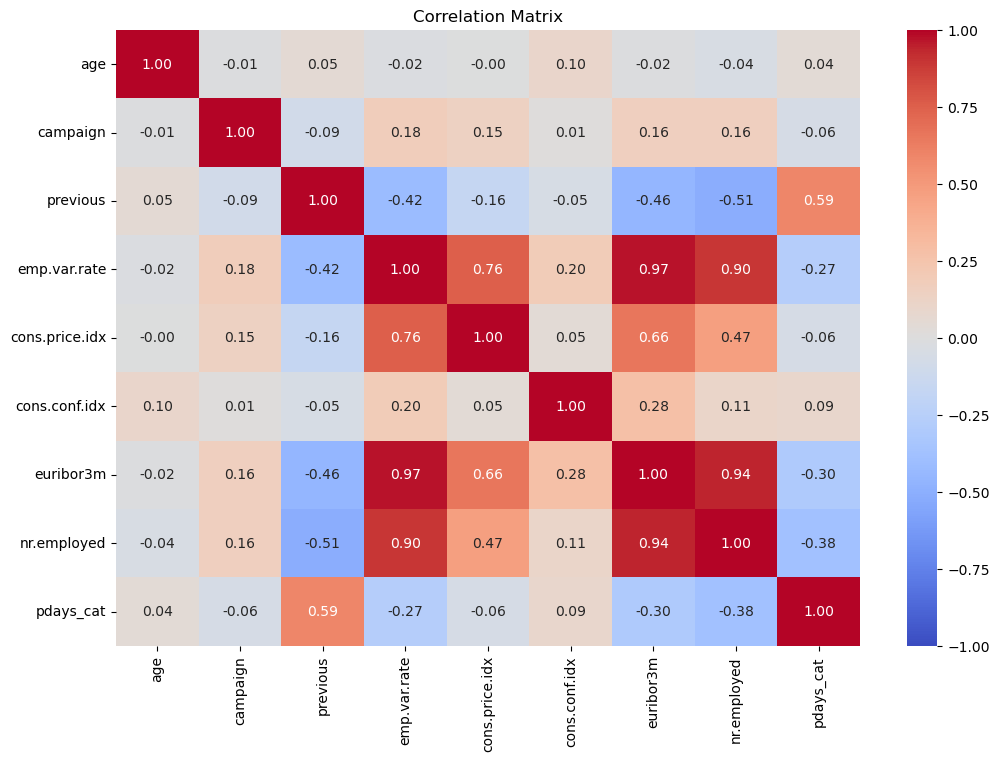

In [19]:
# Calculating the correlation matrix for numerical features
corr_matrix = data.select_dtypes(include=["int64", "float64"]).corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

***There is a very strong positive correlation between euribor3m and emp.var.rate***

***Also a positive strong correlation between nr.employed and euribor3m, and nr.employed and emp.var.rate as well***

***Lastly when we consider 70% and above correlations, there is also a positive correlation between cons.price.idx and emp.var.rate too***


### Feature Selection - Engineering <a class="anchor" id="6">


We can apply the factor analysis method and create a new column called FA since four of the mentioned columns above have high correlations. After this process we drop these columns.

In [20]:
from sklearn.decomposition import FactorAnalysis
fact_2c = FactorAnalysis(n_components=1)
data["FA"] = fact_2c.fit_transform(data[["euribor3m","nr.employed","cons.price.idx","emp.var.rate"]])
data = data.drop(["euribor3m","nr.employed","cons.price.idx","emp.var.rate"],axis=1)

In [23]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome',
       'cons.conf.idx', 'y', 'pdays_cat', 'FA'],
      dtype='object')

In [24]:
data.shape

(4119, 17)

### Data Preprocessing <a class="anchor" id="7">
    
Performing necessary data preprocessing such as encoding categorical variables, handling imbalanced data and scaling numerical features.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

In [175]:
# Separating features and target variable
X = data.drop("y", axis=1)
y = data["y"].apply(lambda x: 1 if x == "yes" else 0)

In [176]:
# Identifying categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

In [177]:
# Defining preprocessing steps
# Scaling numerical columns and encoding categorical variables seperately via column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(), categorical_cols)
    ])

In [178]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [179]:
# Applying preprocessing to training and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [180]:
smote_over_sampling = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote_over_sampling.fit_resample(X_train_preprocessed, y_train)


y
0    2567
1    2567
Name: count, dtype: int64

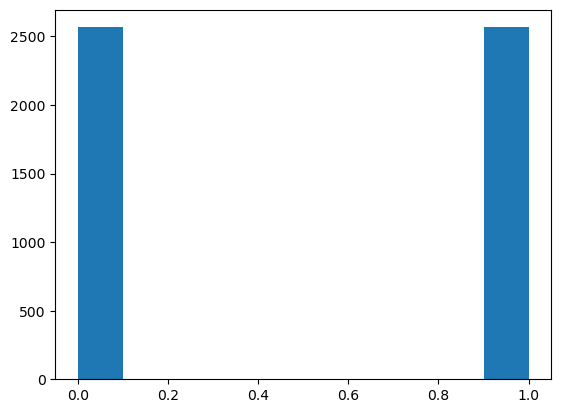

In [181]:
plt.hist(y_train_smote)
y_train_smote.value_counts()

### Model Selection <a class="anchor" id="8">


In [182]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV

In [183]:
# Defining models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

In [189]:
# Train and evaluate models with resampled training data
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_preprocessed)
    
    # Calculate and print evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy}")
    print(f"{name} ROC-AUC Score: {roc_auc}")
    print(f"{name} Classification Report:\n{report}")

Logistic Regression Accuracy: 0.7653721682847896
Logistic Regression ROC-AUC Score: 0.6863255626198405
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      1101
           1       0.25      0.59      0.35       135

    accuracy                           0.77      1236
   macro avg       0.60      0.69      0.60      1236
weighted avg       0.86      0.77      0.80      1236

Random Forest Accuracy: 0.8915857605177994
Random Forest ROC-AUC Score: 0.6174386920980925
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1101
           1       0.51      0.27      0.35       135

    accuracy                           0.89      1236
   macro avg       0.71      0.62      0.65      1236
weighted avg       0.87      0.89      0.88      1236

Neural Network Accuracy: 0.8616504854368932
Neural Network ROC-AUC Score

According to the f1-score, Random Forest seems to be giving the best scores.

### Hyperparameter Tuning <a class="anchor" id="9">


In [190]:
# Example: Hyperparameter tuning for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, 30]
}

In [191]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring="f1"
)

In [192]:
grid_search.fit(X_train_smote, y_train_smote)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best score: 0.9376921913648701


In [194]:
# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_preprocessed)
print(f"Tuned Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_pred_best)}")
print(f"Tuned Random Forest Classification Report:\n{classification_report(y_test, y_pred_best)}")

Tuned Random Forest ROC-AUC Score: 0.6184176001614694
Tuned Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1101
           1       0.47      0.27      0.35       135

    accuracy                           0.89      1236
   macro avg       0.69      0.62      0.64      1236
weighted avg       0.87      0.89      0.87      1236



In [195]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import pickle

In [196]:
# Create a pipeline with SMOTE and the model
def create_pipeline(model):
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])
    return pipeline

In [197]:
# Example usage of the pipeline with the best model
pipeline = create_pipeline(best_model)
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'campaign', 'previous', 'cons.conf.idx', 'pdays_cat', 'FA'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('classifier', RandomForestClassifier(max_depth=20))])

### Evaluation <a class="anchor" id="10">


In [198]:
from sklearn.metrics import confusion_matrix

In [199]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[1060   41]
 [  98   37]]


In [200]:
score = round(accuracy_score(y_test, y_pred_best),3) 
score

0.888

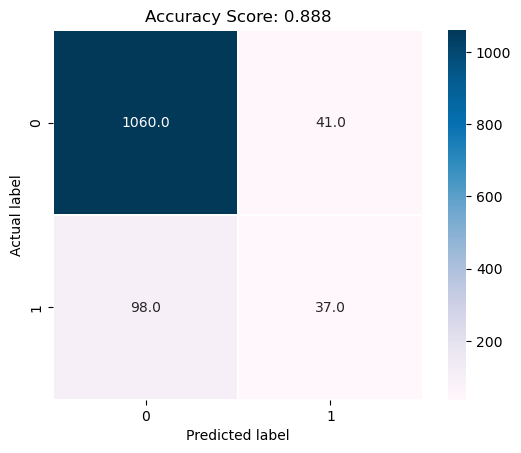

In [201]:
cm1 = conf_matrix
sns.heatmap(cm1, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(score), size = 12)
plt.show()
print("\n") 

In [202]:
# Save the best model to a file
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)
print(f"Best model saved: {best_model}")

Best model saved: RandomForestClassifier(max_depth=20)


## References <a class="anchor" id="11">

https://archive.ics.uci.edu/dataset/222/bank+marketing